# DeltaSquare NGO Project

## Description
### Context:
DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are tasked with coming up with a policy framework by looking at the data government got from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government.

### Problem:
The dataset aims to answer the following key questions:

- What are the different factors that influence the income of an individual?

- Is there a good predictive model for income that exists? What does the performance assessment look like for such a model?

### Attribute Information:

- age: continuous - age of a Person
- workclass: Where do a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: This weight is assigned by the Current Population Survey (CPS). People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics continuous
- education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: no. of years a person studied - continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: Investment gain of the person other than salary - continuous
- capital-loss: Loss from investments - continuous
- hours-per-week: No. of hours a person works - continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)


## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (precision_score, 
                             recall_score, 
                             f1_score,
                            accuracy_score,
                            precision_recall_curve,
                            roc_auc_score,
                            roc_curve,
                            confusion_matrix,
                            ConfusionMatrixDisplay)

## Load and review data

In [2]:
# load the data

data = pd.read_csv('who_data.csv')

## Explore the data

In [3]:
# let's create a copy of the data

df = data.copy()

In [4]:
# Check number of columns and rows in data frame
df.shape

(32561, 15)

In [5]:
# check first 5 rows of data set

df.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# checking column datatypes and number of non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

#### Observation(s)
There are no missing value in the dataset

In [7]:
# checking for duplicate values

df.duplicated().sum()

24

#### Observation(s)
- There are 24 duplicate value in the data.
- We will drop the duplicate values.

In [8]:
# drop the duplicates

df.drop_duplicates(inplace=True)

# reset the index

df.reset_index(drop=True, inplace=True)

In [9]:
# Get all the columns in the data set
cols = df.columns.to_list()

In [10]:
# print out the numbers of unique entries and all the frequency for each variables

for col in cols:
    unique_vals = df[col].nunique()
    print(f"Number of unique values in {col}: {unique_vals}")
    print(f"Frequency of {col} variable in decending order below")
    print(df[col].value_counts())
    print('*' * 50)
    print("\n")
          
    

Number of unique values in age: 73
Frequency of age variable in decending order below
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
**************************************************


Number of unique values in workclass: 9
Frequency of workclass variable in decending order below
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
**************************************************


Number of unique values in fnlwgt: 21648
Frequency of fnlwgt variable in decending order below
164190    13
123011    13
203488    13
148995    12
113364    12
          ..
138342     1
158040     1
232784     1
325573     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
************

#### **Observations**
We can classify the variable into categorical and numerical

- *workclass*, *education*, *marital_status*, *occupation*, *relationship*, *race*, *sex*, *native_country* and *salary* are categorical-type variables.
- *age*, *fnlwgt*, * education_no_of_years*, *capital_gain*, *capital_loss* and *working_hours_per_week* are numerical variables.


In [11]:
# Let's look at the statistical summary of the data

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32537.0,NaN,NaN,NaN,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
workclass,32537,9,Private,22673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32537.0,NaN,NaN,NaN,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education,32537,16,HS-grad,10494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_no_of_years,32537.0,NaN,NaN,NaN,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
marital_status,32537,7,Married-civ-spouse,14970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32537,15,Prof-specialty,4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32537,6,Husband,13187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32537,5,White,27795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32537,2,Male,21775,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observation(s)

- The age range is between 17years and 90years.
- Majority in the dataset(~65%) work for private organisation
- Majority in the dataset(~30%) are high school graduate
- Majority in the dataset(~40) are in a married relationship
- Majority in the dataset are husband in their relationship
- Majority in the dataset are male
- Majority in the dataset are white
- **The dependant variable whiich is salary has majority earning below or equal to 50K**

## Data Cleaning 

### Question marks treatment in variables
- we observer that workclass, occupation and native_countries has some entries for question mark
- we can treat then well by calling them others

In [12]:
#treat = ['workclass', 'occupation', 'native_country']
#for i in treat:
 #   df[i] = df[i].replace('?', 'others', inplace=True)


### Treat target variable
- Classify target variable into 1 and 0

In [13]:
# map '>50K' to 1 and '<=50K' to 0

df['salary'] = df['salary'].replace({' >50K': 1, ' <=50K': 0})


## Exploratory Data Analysis

### Univariate Analysis 
- Here, we will use our utility functions for visualization

In [14]:
from utils import histogram_boxplot, labeled_barplot

#### Numerical Plots

##### ***Age*** 

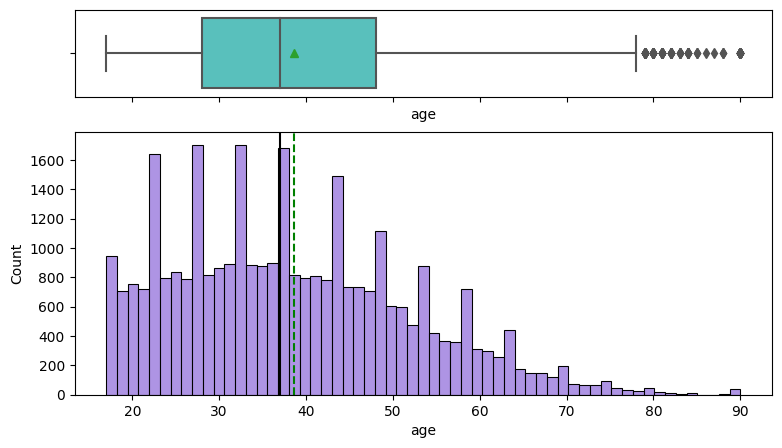

In [15]:
histogram_boxplot(data = df, feature = "age")

**Observations**

- The age variable is fairly distributed, however there are few notable outlier which are fine

##### ***fnlwgt*** 

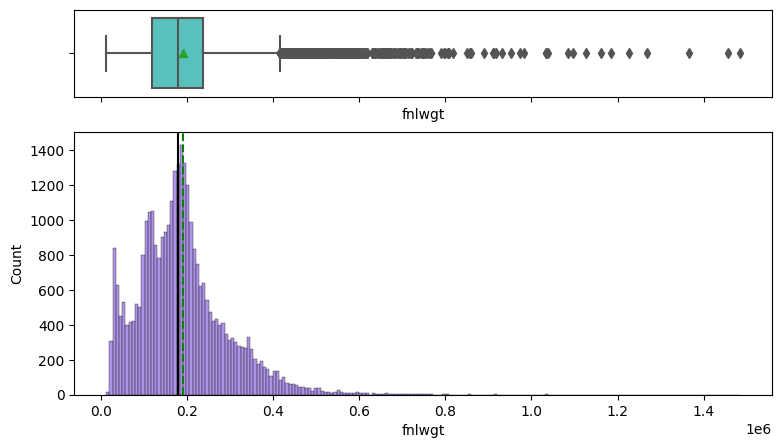

In [16]:
histogram_boxplot(data = df, feature = "fnlwgt")

**Observations**

- *fnlwgt* is right-skewed with lots of outliers at the upper ends.

##### ***education_no_of_years***

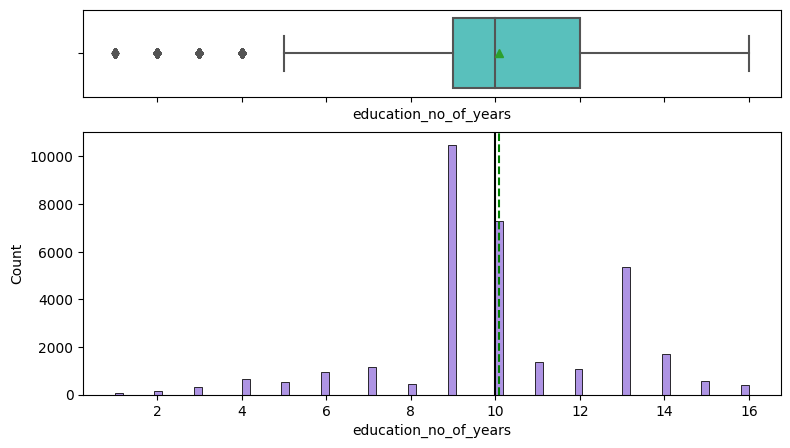

In [17]:
histogram_boxplot(data = df, feature = "education_no_of_years")

**Observations**

- Majority in the population size spent Nine(9) years on education

##### ***capital_gain***

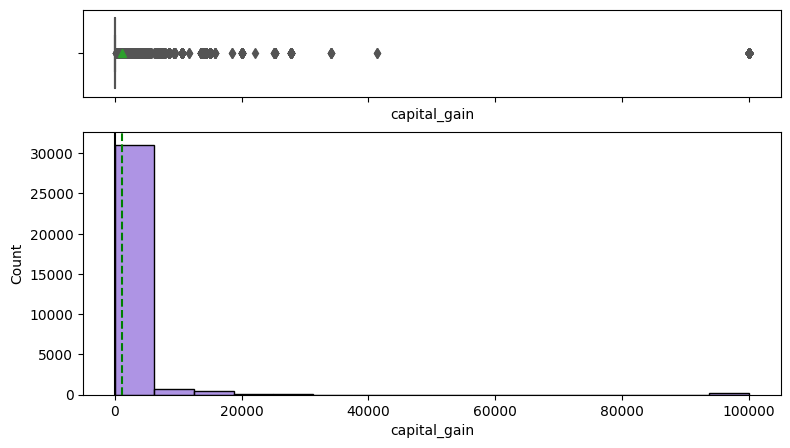

In [18]:
histogram_boxplot(data = df, feature = "capital_gain")

**Observations**

- Capital gain is majorly dominated by population size whose investment yielded little or no result this account for more than 90% of the population size. hence the skewness to the right and upper outliers
- The remark above is subjective as we did not have information on how much was invested 
- The bivariate analysis would show more

##### ***captial_loss***

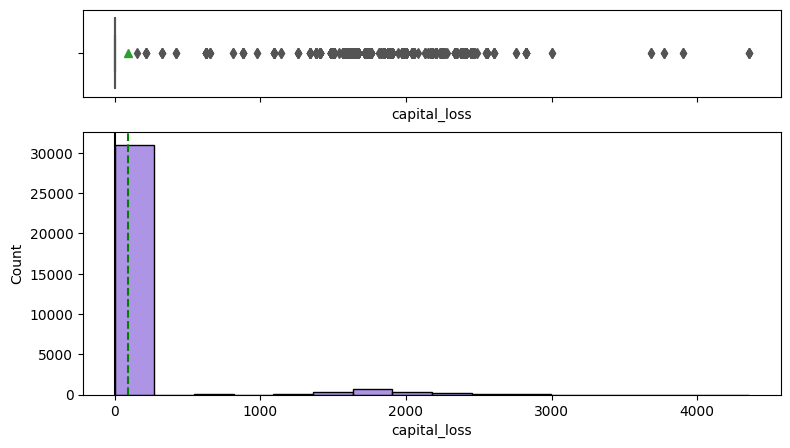

In [19]:
histogram_boxplot(data = df, feature = "capital_loss")

**Observations**

- We had minimal loss on investment as it average at $87.3, however there are few pocket of extreme loss as seen in the outliers on the box plot. 
- Bivariate would show more

##### ***working_hours_per_week***

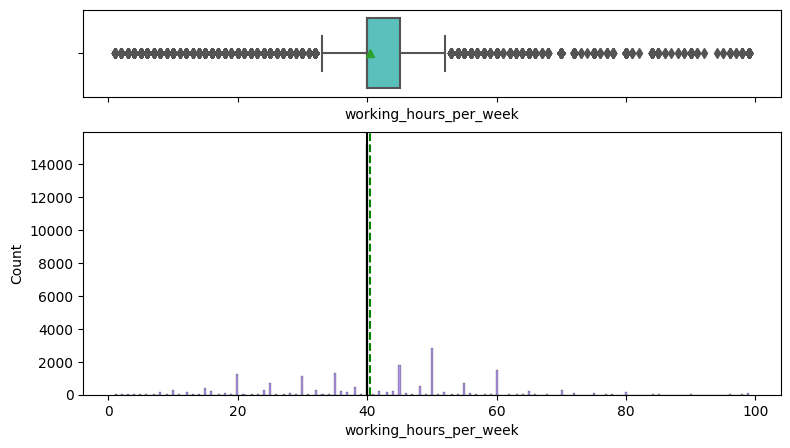

In [20]:
histogram_boxplot(data = df, feature = "working_hours_per_week")

**Observations**

- An average of 40 hour work per week is seen in the population size
- From the above we can infere that the population size is hardworking

#### Categorical Plots

##### ***workclass*** 

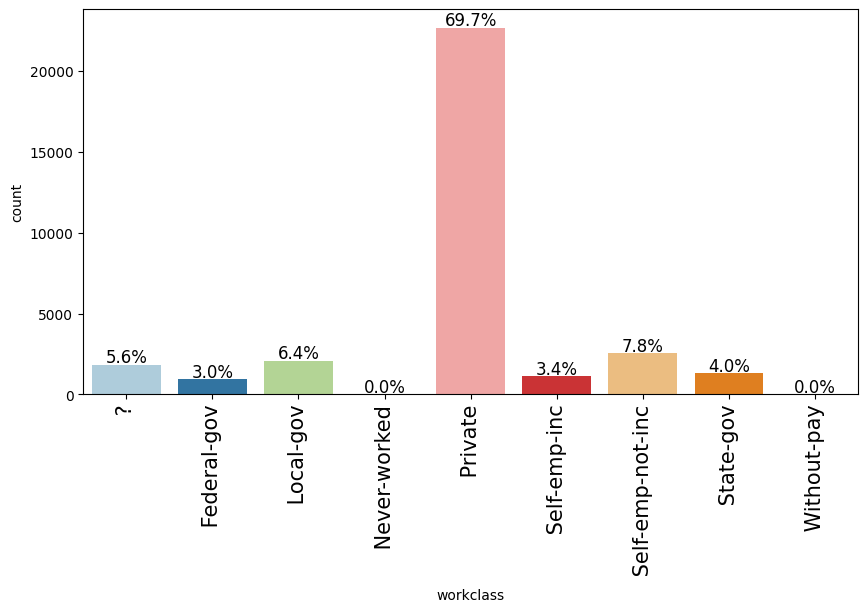

In [21]:
labeled_barplot(df, "workclass", perc=True)

**Observations**

- Employee working in the private sector accounts for 69.7% of the population size
- Hence, the policy should be private sector driven

##### ***education*** 

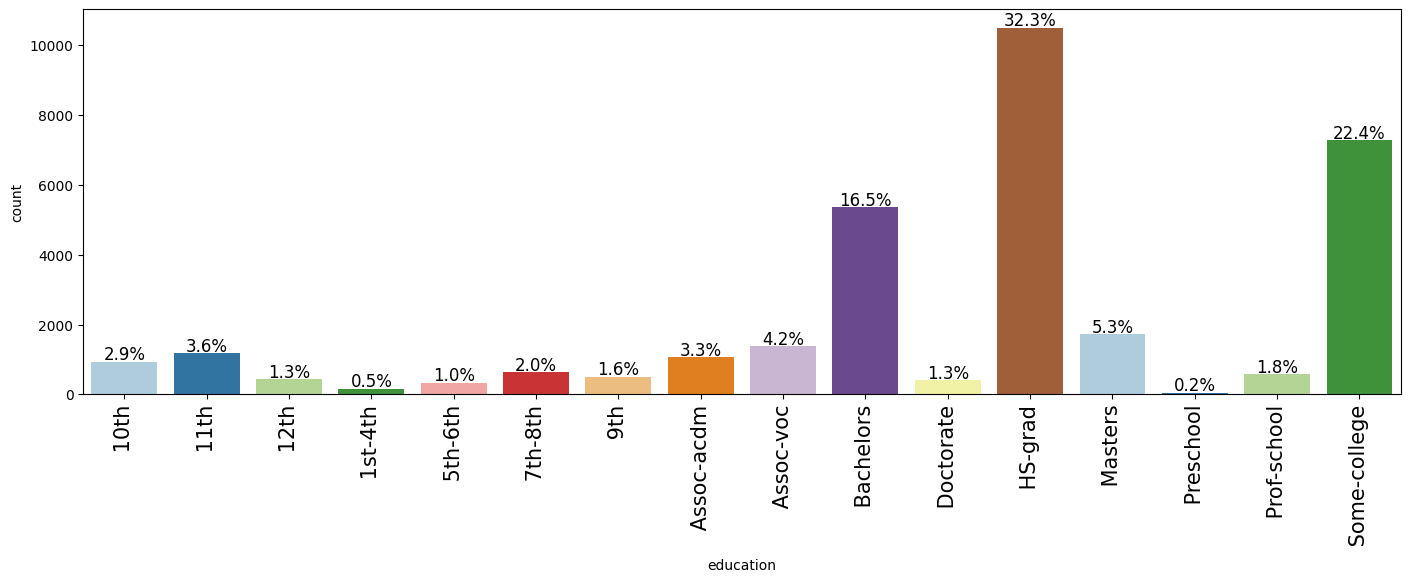

In [22]:
labeled_barplot(df, "education", perc=True)

**Observations**

- The Dataset shows an educated population sample with more than 75% having graduated from High school

##### ***marital_status*** 

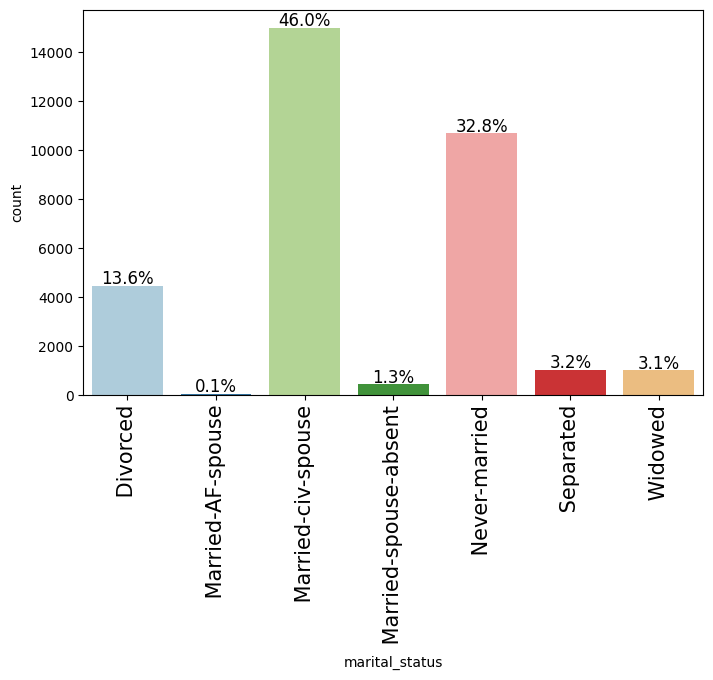

In [23]:
labeled_barplot(df, "marital_status", perc=True)

**Observations**

- More than 65% has tasted marriage before
- We would look at the impact of their marriage on her income and investment

##### ***occupation*** 

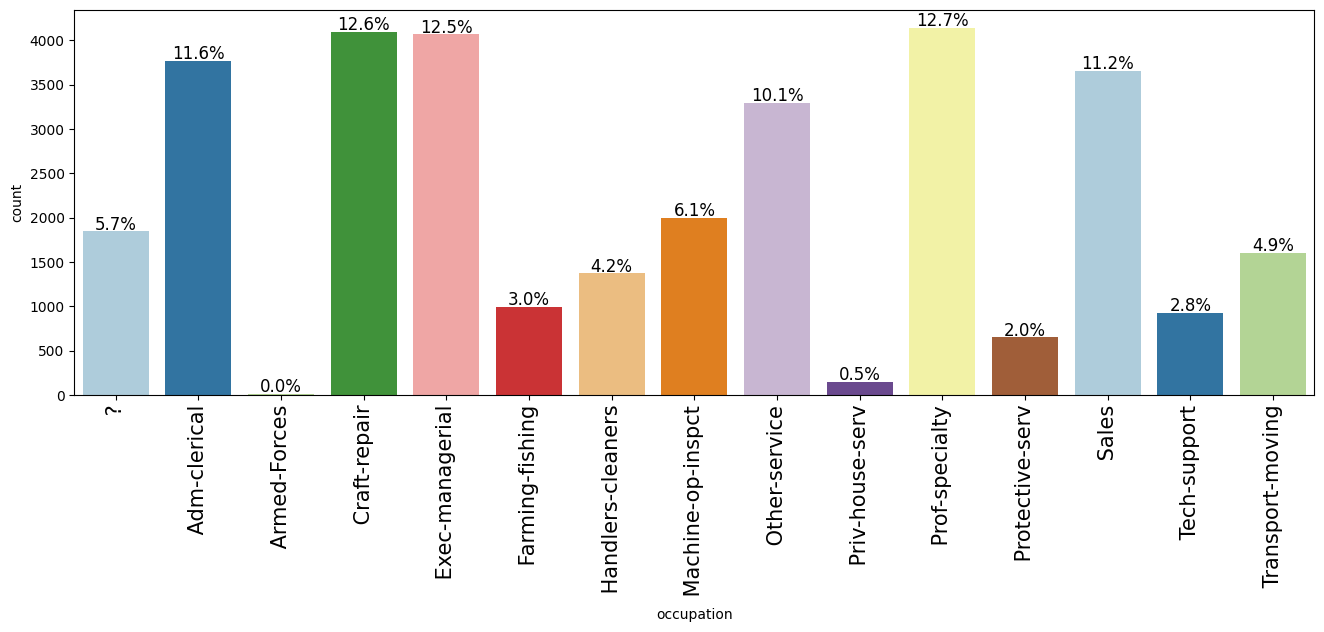

In [24]:
labeled_barplot(df, "occupation", perc=True)

**Observations**

- Professional occupation account for more than 75% of the population size
- 12.5% are in decision making bracket - The executive managers

##### ***relationship*** 

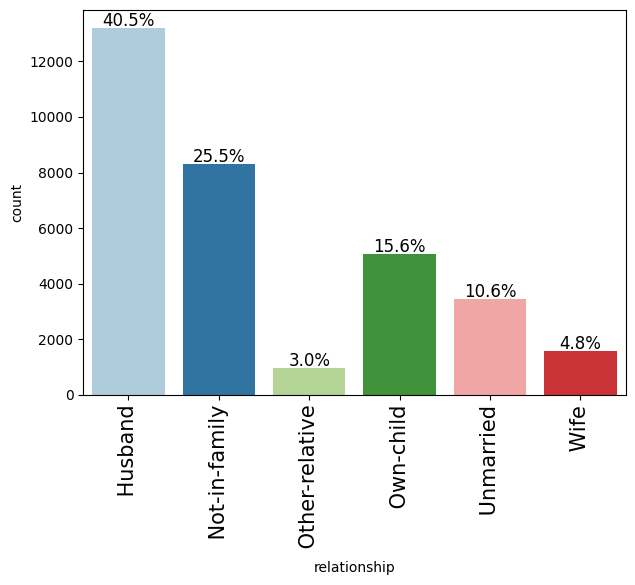

In [25]:
labeled_barplot(df, "relationship", perc=True)

**Observations**

- The dataset has higher percentage of husband as compared to wife

##### ***race*** 

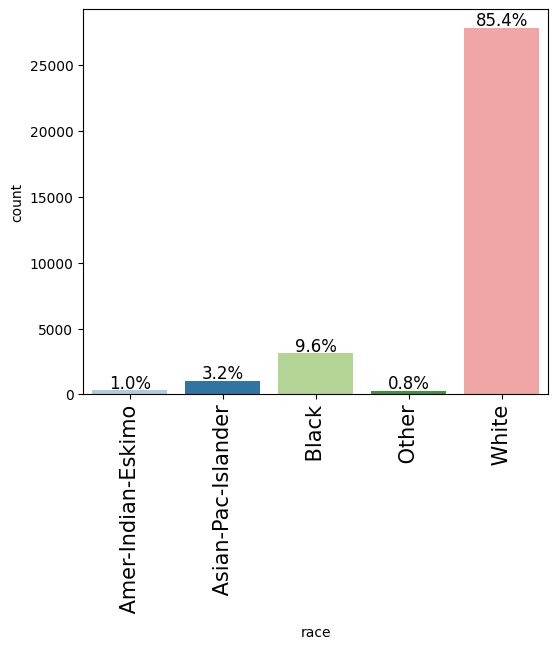

In [26]:
labeled_barplot(df, "race", perc=True)

**Observations**

- The dataset has white race accouting for 85.4% as compared to others

##### ***sex*** 

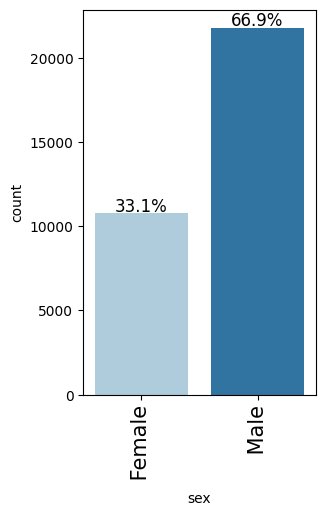

In [27]:
labeled_barplot(df, "sex", perc=True)#

**Observations**

- The dataset has more Male than female

##### ***native_country*** 

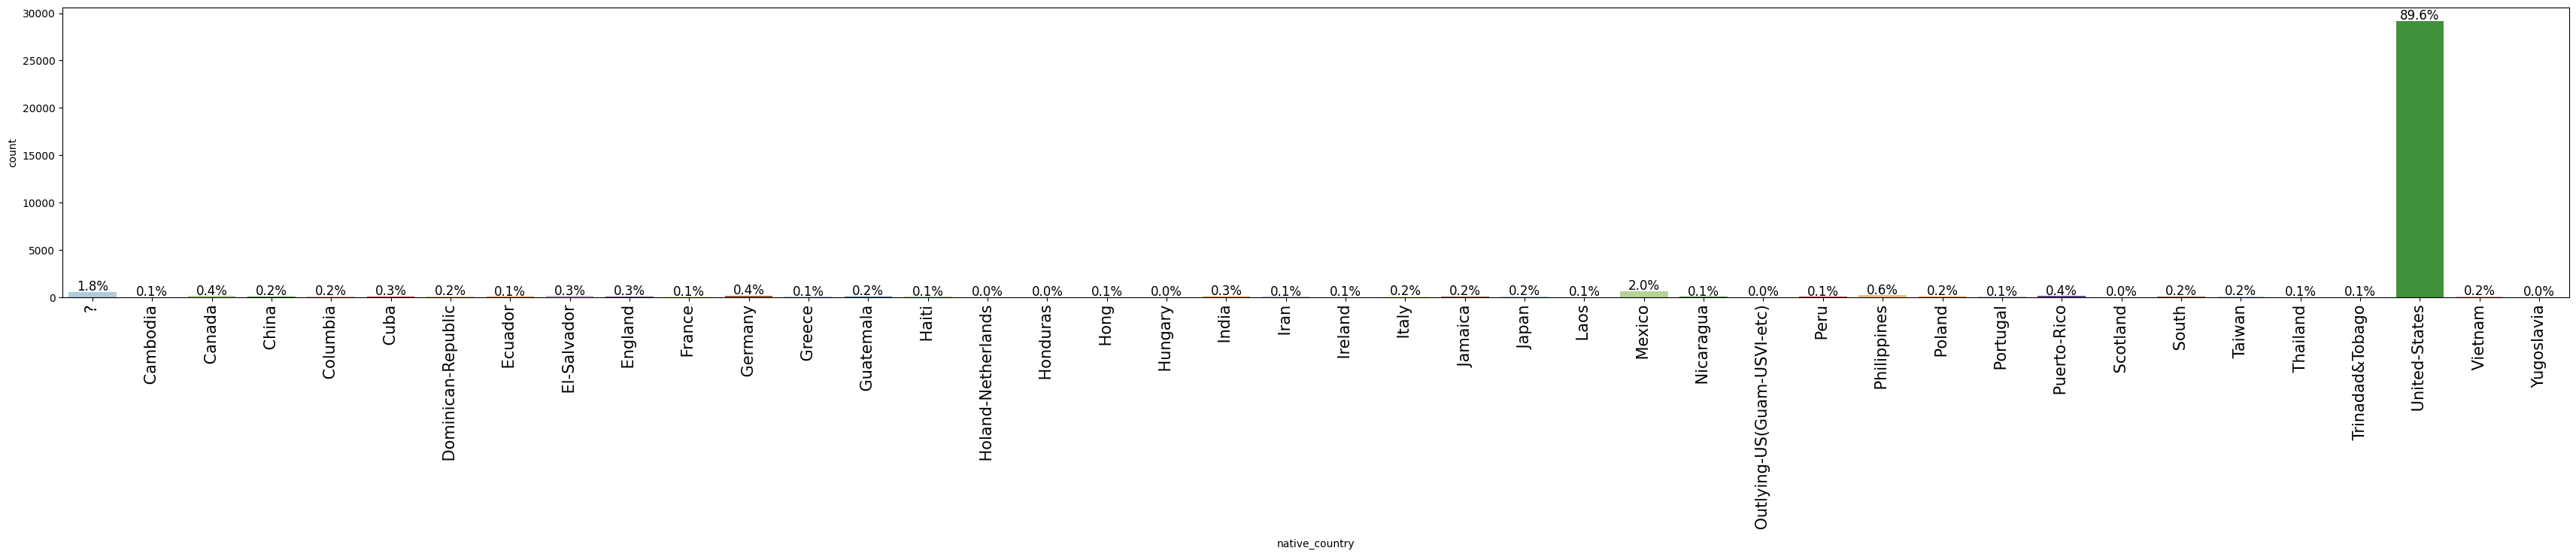

In [28]:
labeled_barplot(df, "native_country", perc=True)

**Observations**

- More people from the United States of America participated in the survey than other countries as it account for 89.6% of the entire dataset

##### ***salary*** 

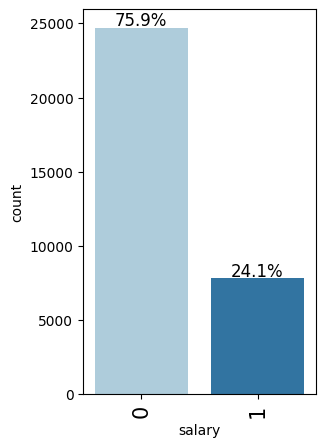

In [29]:
labeled_barplot(df, "salary", perc=True)

**Observations**

- Less than or equal to 50K is the majorirty class and that represent **0** in our classificaiton
- Greater that 50K is the minority class and that represent **1** in our classification

### Bivariate Analysis 

##### Corellation Plot

**Let's check the correlation between numerical columns.**

C:\Users\User\AppData\Local\Temp\ipykernel_19444\3859020170.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")


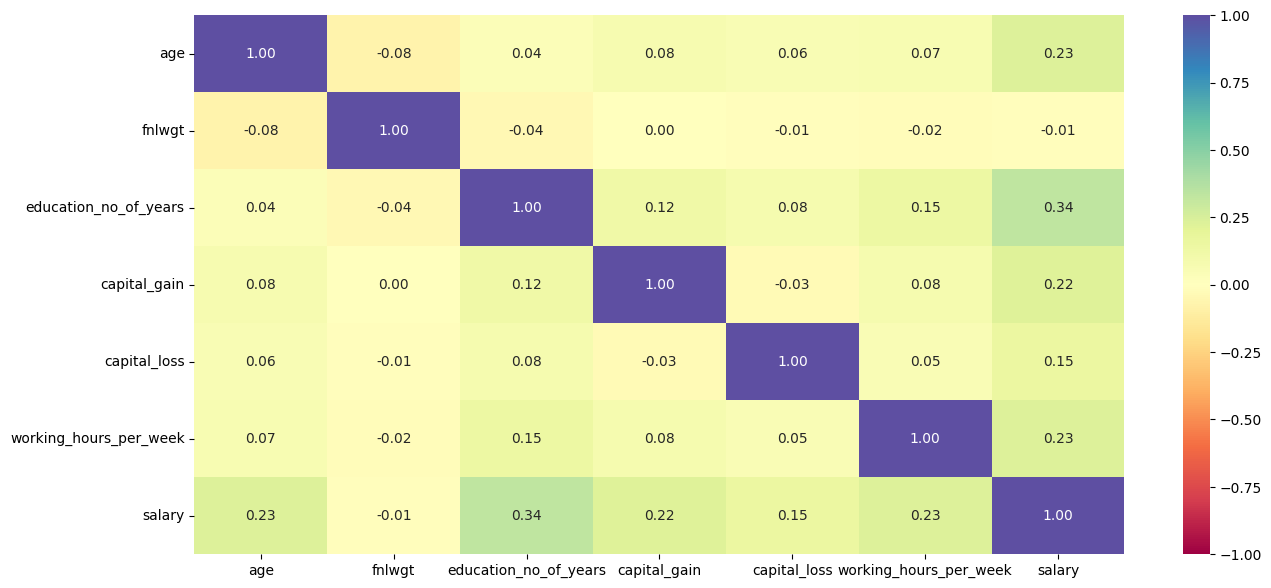

In [30]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

- *The numerical variables has low correlation with the target variable
- The numerical variables are not correlated to each other

## Calculate status ratio of <=50K/>50K from outcome variable 

In [31]:
df['salary'].value_counts()

0    24698
1     7839
Name: salary, dtype: int64

In [32]:
df['salary'].value_counts(normalize=True)

0    0.759074
1    0.240926
Name: salary, dtype: float64

**Observations**

- 75.9% earn salary below or equal to 50K. This is the majorirty class and that represent **0** in our classificaiton
- 24.1% earns salary above 50K. This is the minority class and that represent **1** in our classification

## Spliting the data 
We will use 80% of data for training and 20% for testing.

In [33]:
X = df.drop('salary', axis=1)
y = df['salary']

### One-Hot Encoding

In [34]:
X = pd.get_dummies(X, drop_first=True)

In [35]:
X

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32533,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32534,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32535,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


#### Lets check split of data

In [36]:
# split into train, validation and test with stratification

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0, stratify=y_train_val)

# Print the shapes of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (20823, 100) (20823,)
Validation set shape: (5206, 100) (5206,)
Testing set shape: (6508, 100) (6508,)


### Data Normalization/Scaling

In [37]:
# Instantiate StandardScaler object
scaler = StandardScaler()

# Fit scaler to training data and transform it
X_train_sc = scaler.fit_transform(X_train)

# Transform validation data
X_val_sc = scaler.transform(X_val)

# Transform test data
X_test_sc = scaler.transform(X_test)

## Logistic Regression

In [38]:
log_reg = LogisticRegression()

## Training Pipeline

In [39]:
# function to train a model and compute train accuracy

def train(model, X, y):
    """
    Function to train a model and compute accuracy
    
    model: Model not yet trained
    X: train features
    y: train target
    
    """
    
    trained_model = model.fit(X, y)
    preds = trained_model.predict(X)
    acc = accuracy_score(y, preds)
    print(f"Train Accuracy: {acc}")
    
    return trained_model

In [40]:
log_reg_model = train(log_reg, X_train_sc, y_train)

Train Accuracy: 0.8546318974211209


In [41]:
# function to evaluate the model and compute metrics on test data

def evaluate(model, X, y, threshold=0.5):
    """
    Function to evaluate our trained model with different metrics
    
    model: trained model(classifier)
    X: validation features
    y: target in validation data
    
    threshold: value to filter our prediction
    """
    
    pred_proba = model.predict_proba(X)[:, 1]
    pred_class = np.round(pred_proba > threshold) # convert to 0 or 1
    acc = accuracy_score(y, pred_class)
    recall = recall_score(y, pred_class)
    precision = precision_score(y, pred_class)
    f1 = f1_score(y, pred_class)
    spec = recall_score(y, pred_class, pos_label=0)
    
    df = pd.DataFrame({
        "Accuracy": acc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1,
        "Specificity:": spec
    }, index=[0])
    
    conf = confusion_matrix(y, pred_class, labels=[0,1])
    disp = ConfusionMatrixDisplay(conf, display_labels=[0,1])
    disp.plot()
    plt.show()
    
    return df

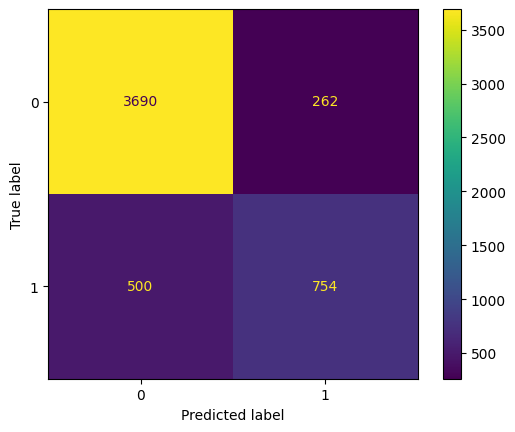

,Accuracy,Recall,Precision,F1,Specificity:
0,0.85363,0.601276,0.742126,0.664317,0.933704


In [42]:
log_reg_df = evaluate(log_reg_model, X_val_sc, y_val)

log_reg_df

#### Interpretation
- Accuracy: This model would predict correctly the class the income of an individual falls into 85% of the time
- Recall: Considering only the positive class(Class 1), The model predicted 60% correctly to be earn above 50K. TP/(TP+FN)
- Precision: Out of all the people in our sample, the model predicted 74% to earn above 50K. TP/(TP+FP)
- F1: its the combination of both Precision and Recall
- Specificity: Considering only the negative class(Class 0), The model predicted 93.3% correctly to be earn below 50K. TN/(TN+FP) 

# Model Improvement
1.  Using Model Hyper parameter tunning
2.  Using data adjustment **Balancing the data**
3.  Improve the model using its metrics a case of **ROC - AUC**: We already know that the default threshold is 0.5 ROC_Curve gives varying threshould which can be used to the hightest value of (TPR -FPR) which give a distinct classification.


## 1. Model Hyperparameter tunning

In [43]:
c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

accs = []

for c in c_values:
    model = LogisticRegression(C = c)
    model.fit(X_train_sc, y_train)
    acc = model.score(X_val_sc, y_val)
    accs.append(acc)
    

In [44]:
optimal_idx = np.argmax(accs)
optimal_c = c_values[optimal_idx]

optimal_c

0.1

### Instantiate a new Logistic regression using the c value gotten

Train Accuracy: 0.8548720165201941


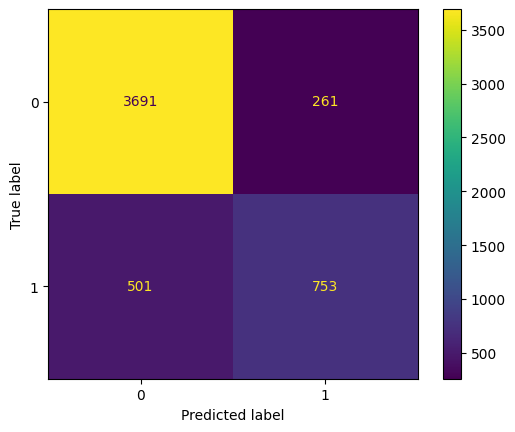

,Accuracy,Recall,Precision,F1,Specificity:
0,0.85363,0.600478,0.742604,0.664021,0.933957


In [45]:
log_reg_c = LogisticRegression(random_state=0, C=optimal_c)

log_reg_c_model = train(log_reg_c, X_train_sc, y_train)

evaluate(log_reg_c_model, X_val_sc, y_val)

**Model Improvement**
Changing the value of C does no improve the model

## 2. Model improvement using Data. Balancing the data

In [46]:
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [47]:
def balance_data(X, y, smote_type ):
    """
    X: Train features
    y: Train target
    smote_type: The imbalance strategy
    
    """
    
    X_res, y_res = smote_type.fit_resample(X, y)    
    
    return X_res, y_res

In [48]:
under = RandomUnderSampler(random_state=0)
over = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)
borderdline = BorderlineSMOTE(random_state=0)
adasyn = ADASYN(random_state=0)

X_train_un, y_train_un = balance_data(X_train_sc, y_train, under)
X_train_ov, y_train_ov = balance_data(X_train_sc, y_train, over)
X_train_sm, y_train_sm = balance_data(X_train_sc, y_train, smote)
X_train_bdl, y_train_bdl = balance_data(X_train_sc, y_train, borderdline)
X_train_ada, y_train_ada = balance_data(X_train_sc, y_train, adasyn)

### Train the model for each smote type

**using undersampling**

Train Accuracy: 0.8281841738090492


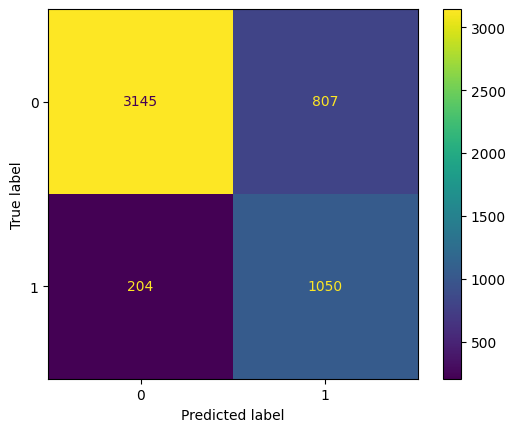

,Accuracy,Recall,Precision,F1,Specificity:
0,0.805801,0.837321,0.565428,0.675024,0.7958


In [49]:
log_reg_un = train(log_reg, X_train_un, y_train_un)

evaluate(log_reg, X_val_sc, y_val)

**over undersampling**

Train Accuracy: 0.8264266734151589


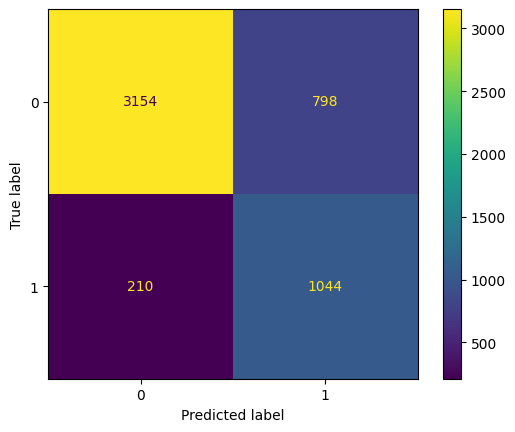

,Accuracy,Recall,Precision,F1,Specificity:
0,0.806377,0.832536,0.566775,0.674419,0.798077


In [50]:
log_reg_ov = train(log_reg, X_train_ov, y_train_ov)

evaluate(log_reg, X_val_sc, y_val)

**Smote sampling**

Train Accuracy: 0.8373086169808933


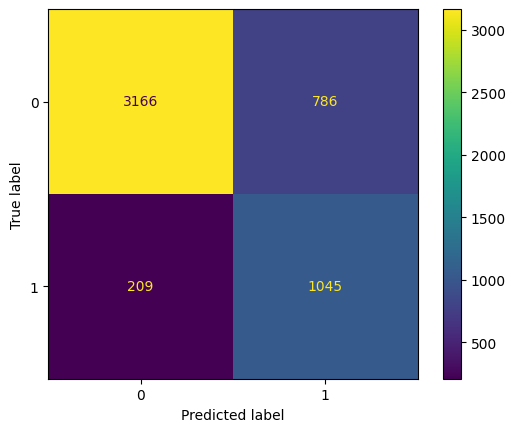

,Accuracy,Recall,Precision,F1,Specificity:
0,0.808874,0.833333,0.570726,0.677472,0.801113


In [51]:
log_reg_sm = train(log_reg, X_train_sm, y_train_sm)

evaluate(log_reg, X_val_sc, y_val)

**Borderline SMOTE sampling**

Train Accuracy: 0.818043780842718


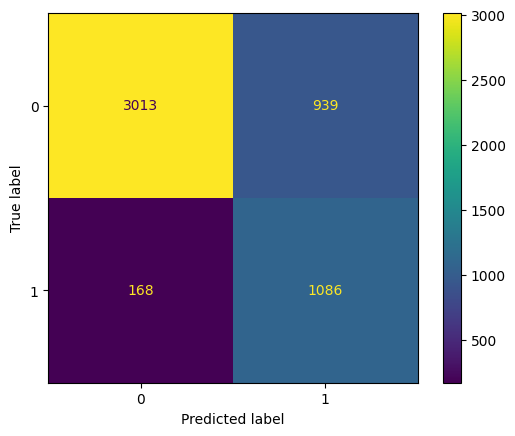

,Accuracy,Recall,Precision,F1,Specificity:
0,0.787361,0.866029,0.536296,0.662397,0.762399


In [52]:
log_reg_bdl = train(log_reg, X_train_bdl, y_train_bdl)

evaluate(log_reg, X_val_sc, y_val)

**ADASYN SMOTE sampling**

Train Accuracy: 0.810976558851913


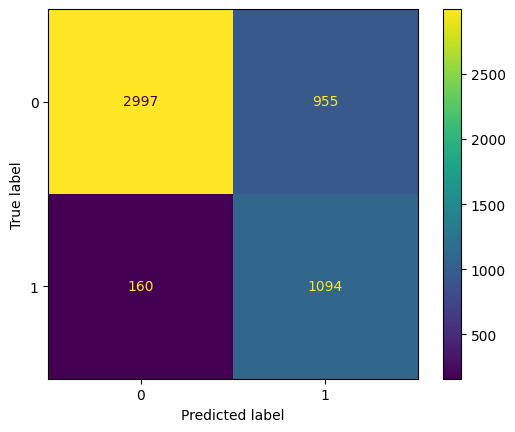

,Accuracy,Recall,Precision,F1,Specificity:
0,0.785824,0.872408,0.533919,0.662428,0.75835


In [53]:
log_reg_ada = train(log_reg, X_train_ada, y_train_ada)

evaluate(log_reg, X_val_sc, y_val)

**The best Optimization method is using the model itself, we increase the specificity to 98.5%**

### Evaluate our model using the new threshold

In [54]:
evaluate(log_reg_model, X_val_sc, y_val, threshold= optimal_thres)

NameError: name 'optimal_thres' is not defined

## 3. ROC - AUC

- ROC - Reciever Operating Characteristics. ROC stands for Receiver Operating Characteristic, which is a curve used to evaluate the performance of binary classification models. It is a graphical representation of the relationship between the true positive rate (TPR) and false positive rate (FPR) at different thresholds for the predicted probabilities of the positive class
- AUC - Area Under the Curve(ROC Curve)

In [43]:
def draw_roc_curve(model, X, y):
    """
    model: Trained model
    X = test or validation features
    y = target in test or validation data
    
    """
    preds = model.predict_proba(X)[:,1]
    auc = roc_auc_score(y, preds)
    tpr, fpr, thres = roc_curve(y, preds)

    plt.figure(figsize = (7,5))
    plt.plot(tpr, fpr, label = f"Logistic Regression {auc:.2f}")
    plt.plot([0,1], [0,1], "r--" )
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc = "lower right")
    plt.show()
    
    return tpr, fpr, thres

- ROC - Reciever Operating Characteristics. ROC stands for Receiver Operating Characteristic, which is a curve used to evaluate the performance of binary classification models. It is a graphical representation of the relationship between the true positive rate (TPR) and false positive rate (FPR) at different thresholds for the predicted probabilities of the positive class
- AUC - Area Under the Curve(ROC Curve)

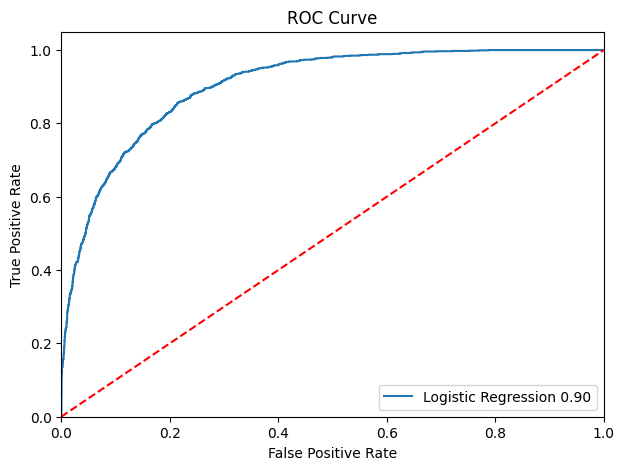

In [44]:
tpr, fpr, thres = draw_roc_curve(log_reg_model, X_val_sc, y_val)

In [45]:
optimal_idx = np.argmax(fpr - tpr)


optimal_thres = 1 - thres[optimal_idx] #since we are considering the negative class

optimal_thres

0.776630263273967

### Evaluate our model using the new threshold

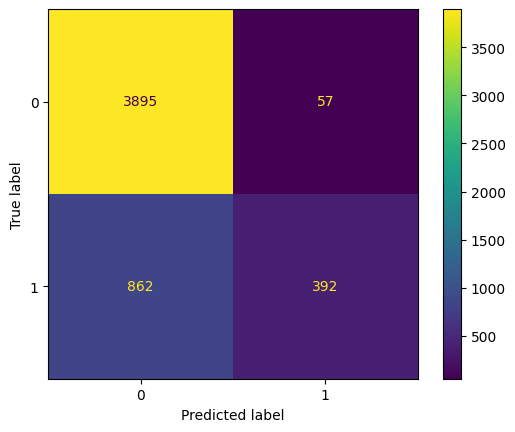

,Accuracy,Recall,Precision,F1,Specificity:
0,0.823473,0.3126,0.873051,0.460364,0.985577


In [46]:
evaluate(log_reg_model, X_val_sc, y_val, threshold= optimal_thres)

## Business Recommendations

- Using Linear regression to predict the class, I would recommend we use the model optimization method to get the best result of the True Negative as this increases our **Specificity -Considering only the negative class(Class 0), The model predicted 98.5% correctly to be earn below 50K. TN/(TN+FP)** 
- using the recommended model above the NGO can create policy to better the livelihood of the underpriviledge knowing fully the class they would belong to given the sets of variables

### The best factor that influence the income of an individual

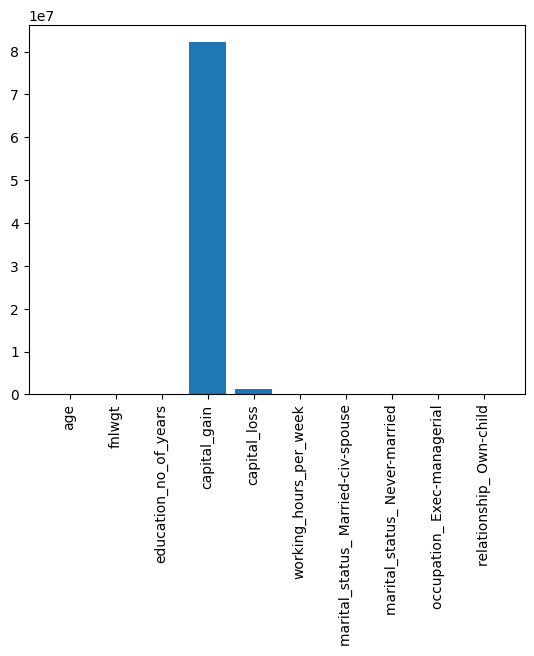

In [60]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=10) 
selector.fit_transform(X, y)

# Get the indices of the selected features
mask = selector.get_support()

# Get the names of the selected features
selected_features = X.columns[mask]

# Plot the feature importance
plt.bar(selected_features, selector.scores_[mask])
plt.xticks(rotation=90)
plt.show()

**Recommendation**

Captial gain incured from investment could increase the income of an individual